              CommentId      VideoId  \
0  Ugg2KwwX0V8-aXgCoAEC  04kJtp6pVXI   
1  Ugg2s5AzSPioEXgCoAEC  04kJtp6pVXI   
2  Ugg3dWTOxryFfHgCoAEC  04kJtp6pVXI   
3  Ugg7Gd006w1MPngCoAEC  04kJtp6pVXI   
4  Ugg8FfTbbNF8IngCoAEC  04kJtp6pVXI   

                                                Text  IsToxic  IsAbusive  \
0  If only people would just take a step back and...    False      False   
1  Law enforcement is not trained to shoot to app...     True       True   
2  \nDont you reckon them 'black lives matter' ba...     True       True   
3  There are a very large number of people who do...    False      False   
4  The Arab dude is absolutely right, he should h...    False      False   

   IsThreat  IsProvocative  IsObscene  IsHatespeech  IsRacist  IsNationalist  \
0     False          False      False         False     False          False   
1     False          False      False         False     False          False   
2     False          False       True         False     False 

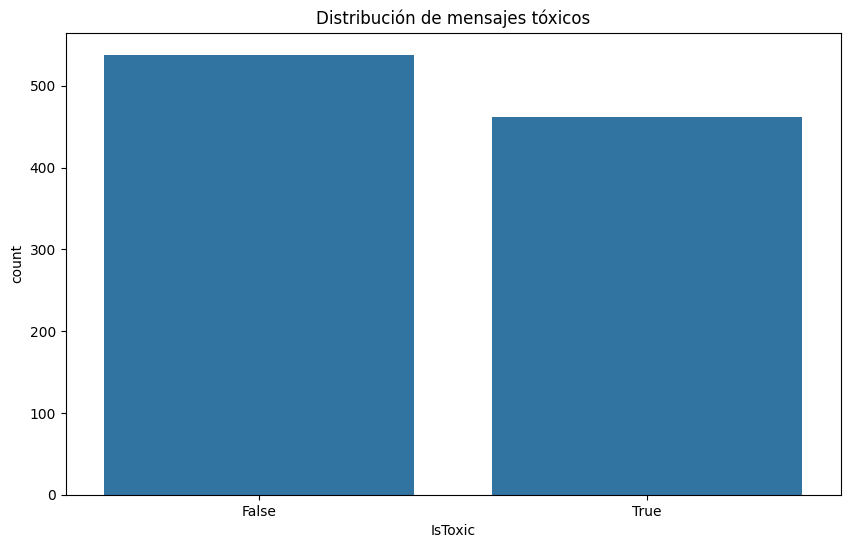

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_csv('youtoxic_english_1000.csv')

# Visualizar las primeras filas
print(df.head())

# Información sobre el dataset
print(df.info())

# Estadísticas descriptivas
print(df.describe())

# Visualizar la distribución de mensajes tóxicos
plt.figure(figsize=(10, 6))
sns.countplot(x='IsToxic', data=df)
plt.title('Distribución de mensajes tóxicos')
plt.show()

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()

    # Eliminar caracteres especiales
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenización
    tokens = word_tokenize(text)

    # Eliminar stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    return ' '.join(tokens)

# Aplicar preprocesamiento
df['processed_text'] = df['Text'].apply(preprocess_text)


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/sunbay85/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /Users/sunbay85/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sunbay85/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Preparar características (X) y etiquetas (y)
X = df['processed_text']
y = df['IsToxic']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorización TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Crear y entrenar el modelo
model = LogisticRegression(random_state=42)
model.fit(X_train_vectorized, y_train)

# Hacer predicciones
y_pred = model.predict(X_test_vectorized)

# Evaluar el modelo
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.60      0.83      0.69        93
        True       0.77      0.51      0.62       107

    accuracy                           0.66       200
   macro avg       0.69      0.67      0.66       200
weighted avg       0.69      0.66      0.65       200

[[77 16]
 [52 55]]


In [13]:
from sklearn.model_selection import GridSearchCV

# Definir parámetros para búsqueda
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Realizar búsqueda de cuadrícula
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_vectorized, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Evaluar el mejor modelo
y_pred_best = best_model.predict(X_test_vectorized)
print(classification_report(y_test, y_pred_best))

/Users/sunbay85/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sunbay85/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sunbay85/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sunbay85/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sunbay85/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sunbay85/Library/Python/3.9/lib/python/sit

              precision    recall  f1-score   support

       False       0.64      0.75      0.69        93
        True       0.75      0.64      0.69       107

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.70      0.69      0.69       200



/Users/sunbay85/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [15]:
def classify_comment(comment):
    processed = preprocess_text(comment)
    vectorized = vectorizer.transform([processed])
    prediction = best_model.predict(vectorized)
    return "Tóxico" if prediction[0] else "No tóxico"

# Ejemplo de uso
print(classify_comment("You are an idiot!"))
print(classify_comment("Have a good day!"))
print(classify_comment("Have a bad day!"))
print(classify_comment("Fuck you!"))
print(classify_comment("Fuck!"))

Tóxico
No tóxico
Tóxico
Tóxico
Tóxico


In [16]:
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Cargar los datos
df = pd.read_csv('youtoxic_english_1000.csv')

# Función de preprocesamiento
def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()

    # Eliminar caracteres especiales
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenización
    tokens = word_tokenize(text)

    # Eliminar stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    return ' '.join(tokens)

# Aplicar preprocesamiento
df['processed_text'] = df['Text'].apply(preprocess_text)

# Preparar características (X) y etiquetas (y)
X = df['processed_text']
y = df['IsToxic']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir la función objetivo para Optuna
def objective(trial):
    # Definir el espacio de búsqueda para los hiperparámetros
    c = trial.suggest_loguniform('c', 1e-5, 1e2)
    tfidf_max_features = trial.suggest_int('tfidf_max_features', 1000, 10000)

    # Crear el pipeline con los hiperparámetros sugeridos
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=tfidf_max_features)),
        ('clf', LogisticRegression(C=c, random_state=42))
    ])

    # Realizar validación cruzada
    score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1')

    # Retornar la media del f1-score
    return score.mean()

# Crear un estudio de Optuna
study = optuna.create_study(direction='maximize')

# Optimizar
study.optimize(objective, n_trials=100)

# Imprimir los mejores hiperparámetros y el mejor score
print('Mejores hiperparámetros:', study.best_params)
print('Mejor f1-score:', study.best_value)

# Entrenar el modelo final con los mejores hiperparámetros
best_c = study.best_params['c']
best_max_features = study.best_params['tfidf_max_features']

final_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=best_max_features)),
    ('clf', LogisticRegression(C=best_c, random_state=42))
])

final_pipeline.fit(X_train, y_train)

# Evaluar el modelo final
y_pred = final_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

# Función para clasificar nuevos comentarios
def classify_comment(comment):
    processed = preprocess_text(comment)
    prediction = final_pipeline.predict([processed])
    return "Tóxico" if prediction[0] else "No tóxico"

# Ejemplo de uso
print(classify_comment("You are an idiot!"))
print(classify_comment("Have a nice day!"))

/Users/sunbay85/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to /Users/sunbay85/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sunbay85/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/sunbay85/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[I 2024-11-11 10:42:33,607] A new study created in memory with name: no-name-af3675be-35ea-4756-a7d1-8dde1ce5ec73
/var/folders/r4/fzsn9p_x26s598yszb9dl5p00000gn/T/ipykernel_7257/4229358935.py:52: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/

Mejores hiperparámetros: {'c': 49.66735093299271, 'tfidf_max_features': 1104}
Mejor f1-score: 0.6370662233471575
              precision    recall  f1-score   support

       False       0.66      0.77      0.71        93
        True       0.77      0.65      0.71       107

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.72      0.71      0.71       200

Tóxico
Tóxico


In [18]:
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Cargar los datos
df = pd.read_csv('youtoxic_english_1000.csv')

# Función de preprocesamiento
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

# Aplicar preprocesamiento
df['processed_text'] = df['Text'].apply(preprocess_text)

# Preparar características (X) y etiquetas (y)
X = df['processed_text']
y = df['IsToxic']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir la función objetivo para Optuna
def objective(trial):
    tfidf_max_features = trial.suggest_int('tfidf_max_features', 1000, 10000)
    alpha = trial.suggest_loguniform('alpha', 1e-10, 1.0)

    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=tfidf_max_features)),
        ('clf', MultinomialNB(alpha=alpha))
    ])

    score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1')
    return score.mean()

# Crear un estudio de Optuna
study = optuna.create_study(direction='maximize')

# Optimizar
study.optimize(objective, n_trials=100)

# Imprimir los mejores hiperparámetros y el mejor score
print('Mejores hiperparámetros:', study.best_params)
print('Mejor f1-score:', study.best_value)

# Entrenar el modelo final con los mejores hiperparámetros
best_max_features = study.best_params['tfidf_max_features']
best_alpha = study.best_params['alpha']

final_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=best_max_features)),
    ('clf', MultinomialNB(alpha=best_alpha))
])

final_pipeline.fit(X_train, y_train)

# Evaluar el modelo final
y_pred = final_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

# Función para clasificar nuevos comentarios
def classify_comment(comment):
    processed = preprocess_text(comment)
    prediction = final_pipeline.predict([processed])
    return "Tóxico" if prediction[0] else "No tóxico"

# Ejemplo de uso
print(classify_comment("You are an idiot!"))
print(classify_comment("Have a nice day!"))

[nltk_data] Downloading package punkt to /Users/sunbay85/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sunbay85/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/sunbay85/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[I 2024-11-11 10:42:57,514] A new study created in memory with name: no-name-2ce032e7-a9e8-46d2-86e6-6f8e00baacf8
/var/folders/r4/fzsn9p_x26s598yszb9dl5p00000gn/T/ipykernel_7257/892714411.py:44: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-10, 1.0)
[I 2024-11-11 10:42:57,554] Trial 0 finished with value: 0.5978743863550248 and parameters: {'tfidf_max_features': 6125, 'alpha': 5.8

Mejores hiperparámetros: {'tfidf_max_features': 1016, 'alpha': 0.33503070721122735}
Mejor f1-score: 0.6400506843067933
              precision    recall  f1-score   support

       False       0.63      0.78      0.70        93
        True       0.76      0.61      0.68       107

    accuracy                           0.69       200
   macro avg       0.70      0.70      0.69       200
weighted avg       0.70      0.69      0.69       200

Tóxico
Tóxico


In [19]:
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Cargar los datos
df = pd.read_csv('youtoxic_english_1000.csv')

# Función de preprocesamiento
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

# Aplicar preprocesamiento
df['processed_text'] = df['Text'].apply(preprocess_text)

# Preparar características (X) y etiquetas (y)
X = df['processed_text']
y = df['IsToxic']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir la función objetivo para Optuna
def objective(trial):
    tfidf_max_features = trial.suggest_int('tfidf_max_features', 1000, 10000)
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 10, 100)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)

    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=tfidf_max_features)),
        ('clf', RandomForestClassifier(n_estimators=n_estimators,
                                       max_depth=max_depth,
                                       min_samples_split=min_samples_split,
                                       random_state=42))
    ])

    score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1')
    return score.mean()

# Crear un estudio de Optuna
study = optuna.create_study(direction='maximize')

# Optimizar
study.optimize(objective, n_trials=100)

# Imprimir los mejores hiperparámetros y el mejor score
print('Mejores hiperparámetros:', study.best_params)
print('Mejor f1-score:', study.best_value)

# Entrenar el modelo final con los mejores hiperparámetros
best_params = study.best_params
final_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=best_params['tfidf_max_features'])),
    ('clf', RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                   max_depth=best_params['max_depth'],
                                   min_samples_split=best_params['min_samples_split'],
                                   random_state=42))
])

final_pipeline.fit(X_train, y_train)

# Evaluar el modelo final
y_pred = final_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


[nltk_data] Downloading package punkt to /Users/sunbay85/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sunbay85/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/sunbay85/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[I 2024-11-11 10:43:14,589] A new study created in memory with name: no-name-bf7ca748-2122-4174-aa8f-690280fa6414
[I 2024-11-11 10:43:15,418] Trial 0 finished with value: 0.5439060939060939 and parameters: {'tfidf_max_features': 1046, 'n_estimators': 266, 'max_depth': 32, 'min_samples_split': 7}. Best is trial 0 with value: 0.5439060939060939.
[I 2024-11-11 10:43:16,995] Trial 1 finished with value: 0.572933403502567 and parameters: {'tfidf_max_features': 6631, 'n_estimators': 510, 'max_depth': 39, 'min_samples_split': 10}. Best is trial 1 with value: 0.572933403502567.
[I 2024-11-1

Mejores hiperparámetros: {'tfidf_max_features': 1189, 'n_estimators': 701, 'max_depth': 76, 'min_samples_split': 7}
Mejor f1-score: 0.6207123469011643
              precision    recall  f1-score   support

       False       0.63      0.83      0.72        93
        True       0.79      0.58      0.67       107

    accuracy                           0.69       200
   macro avg       0.71      0.70      0.69       200
weighted avg       0.72      0.69      0.69       200



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, f1_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from xgboost import XGBClassifier

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Cargar los datos
df = pd.read_csv('youtoxic_english_1000.csv')

# Función de preprocesamiento
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

# Aplicar preprocesamiento
df['processed_text'] = df['Text'].apply(preprocess_text)

# Preparar características (X) y etiquetas (y)
X = df['processed_text']
y = df['IsToxic']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el pipeline con XGBoost
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', XGBClassifier(random_state=42))
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Evaluar en conjunto de entrenamiento
y_train_pred = pipeline.predict(X_train)
train_f1 = f1_score(y_train, y_train_pred)

# Evaluar en conjunto de prueba
y_test_pred = pipeline.predict(X_test)
test_f1 = f1_score(y_test, y_test_pred)

# Calcular overfitting
overfitting = train_f1 - test_f1

print("F1-score en entrenamiento:", train_f1)
print("F1-score en prueba:", test_f1)
print("Overfitting (diferencia):", overfitting)
print("\nInforme de clasificación en conjunto de prueba:")
print(classification_report(y_test, y_test_pred))

# Función para clasificar nuevos comentarios
def classify_comment(comment):
    processed = preprocess_text(comment)
    prediction = pipeline.predict([processed])
    return "Tóxico" if prediction[0] else "No tóxico"

# Ejemplo de uso
print("\nEjemplos de clasificación:")
print(classify_comment("You are an idiot!"))
print(classify_comment("Have a nice day!"))

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score
from sklearn.pipeline import Pipeline
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Función de preprocesamiento
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

# Cargar los datos
df = pd.read_csv('youtoxic_english_1000.csv')

# Aplicar preprocesamiento
df['processed_text'] = df['Text'].apply(preprocess_text)

# Preparar características (X) y etiquetas (y)
X = df['processed_text']
y = df['IsToxic']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el pipeline con Voting Classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', VotingClassifier(estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('lr', LogisticRegression(random_state=42)),
        ('svm', SVC(probability=True, random_state=42))
    ], voting='soft'))
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Evaluar en conjunto de entrenamiento
y_train_pred = pipeline.predict(X_train)
train_f1 = f1_score(y_train, y_train_pred)

# Evaluar en conjunto de prueba
y_test_pred = pipeline.predict(X_test)
test_f1 = f1_score(y_test, y_test_pred)

# Calcular overfitting
overfitting = train_f1 - test_f1

print("F1-score en entrenamiento:", train_f1)
print("F1-score en prueba:", test_f1)
print("Overfitting (diferencia):", overfitting)
print("\nInforme de clasificación en conjunto de prueba:")
print(classification_report(y_test, y_test_pred))

# Función para clasificar nuevos comentarios
def classify_comment(comment):
    processed = preprocess_text(comment)
    prediction = pipeline.predict([processed])
    return "Tóxico" if prediction[0] else "No tóxico"

# Ejemplo de uso
print("\nEjemplos de clasificación:")
print(classify_comment("You are an idiot!"))
print(classify_comment("Have a nice day!"))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


F1-score en entrenamiento: 0.9971910112359551
F1-score en prueba: 0.6770833333333334
Overfitting (diferencia): 0.32010767790262173

Informe de clasificación en conjunto de prueba:
              precision    recall  f1-score   support

       False       0.63      0.78      0.70        93
        True       0.76      0.61      0.68       107

    accuracy                           0.69       200
   macro avg       0.70      0.70      0.69       200
weighted avg       0.70      0.69      0.69       200


Ejemplos de clasificación:
Tóxico
No tóxico
